<a href="https://colab.research.google.com/github/arianarocha40/95828-MLPS/blob/main/Recitation_1_S2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLPS Recitation 1 (Spring 2025)
TA: Zijun Ding

Topics covered today:
- Python OOP basics
- Linear Algebra: Numpy
- Data Processing: Pandas
- Data Visualization: Matplotlib
- Machine Learning Packages: Sklearn and Pytorch



## Installation

There are several ways in which we could install python environment. Using Anaconda is the recommended way, because it comes with all the necesaary libraries bundled. Our recommendation is to use Python 3.x.x >= 3.10

Refer to this [page](https://www.anaconda.com/products/distribution) for details.

In [ ]:
from platform import python_version

print(python_version())

3.11.11


You can now write `.py` files and run those files using python command. However, for the purposes of this class we'll use Jupyter notebooks. Jupyter Notebook is a browser-based coding environment, used extensively for prototyping and interactive development in data science applications. It is also easily available at Google Colab.

## Python OOP basics


Object-Oriented Programming (OOP) is a programming paradigm based on the concept of "objects," which can contain data (attributes) and code (methods). It helps in designing and organizing code by bundling related properties and behaviors into objects.


### 1. Classes and Objects
- **Class**: A blueprint for creating objects.
- **Object**: An instance of a class.

In [ ]:
# Define a class for a simple machine learning dataset
class Dataset:
    def __init__(self, dat):
        self.data = dat  # Attribute

    def get_summary(self):  # Method
        return {
            "mean": sum(self.data) / len(self.data),
            "min": min(self.data),
            "max": max(self.data)
        }

In [ ]:
# Create an object (instance)
dataset = Dataset([1, 2, 3, 4, 5])

In [ ]:
# Access attributes and methods
print(dataset.data)  # Output: [1, 2, 3, 4, 5]
print(dataset.get_summary())  # Output: {'mean': 3.0, 'min': 1, 'max': 5}


[1, 2, 3, 4, 5]
{'mean': 3.0, 'min': 1, 'max': 5}


### 2. Inheritance
Inheritance allows a class to inherit the attributes and methods of another class.


In [ ]:
# Define a base class for a general model
class Model:
    def __init__(self, name):
        self.name = name

    def train(self, data):
        print(f"Training {self.name} with data: {data}")

# Define a derived class for a specific type of model
class LinearModel(Model):
    def __init__(self):
        super().__init__(name="Linear Model")

    def predict(self, x):
        print(f"Predicting with {self.name} for input: {x}")


In [ ]:
# Create an object of the derived class
model = LinearModel()
data = [1, 2, 3, 4, 5]
model.train(data)
model.predict([6, 7])

Training Linear Model with data: [1, 2, 3, 4, 5]
Predicting with Linear Model for input: [6, 7]


### 3. Encapsulation
Encapsulation restricts direct access to an object's data. Attributes can be made private with two underscores.


In [ ]:
class Preprocessor:
    def __init__(self, data):
        self.__data = data  # Private attribute
        self.public_data = data

    def scale_data(self):
        print("Scaling data...")
        self.max = max(self.__data)  # Public attribute
        self.__data = [x / max(self.__data) for x in self.__data]

    def get_data(self):
        return self.__data

# Test encapsulation
preprocessor = Preprocessor([1, 2, 3, 4, 5])
preprocessor.scale_data()
print(preprocessor.get_data())
print(preprocessor.max)


In [ ]:
# You will get error if you run
preprocessor.__data

AttributeError: 'Preprocessor' object has no attribute '__data'

## Linear Algebra

Numpy: A supremely-optimized, well-maintained scientific computing package for Python. We will talk about some most frequently used methods, more on numpy can be found [here](https://numpy.org/devdocs/user/basics.html#numpy-fundamentals).

In [ ]:
import numpy as np

In [ ]:
## install a package
!pip install numpy

In [ ]:
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
u = np.array([[1],
              [2],
              [3]])

In [ ]:
## matrix
print(X)
print("shape:", X.shape)
print("dim (axes):", X.ndim)
print("type of elements:", X.dtype.name)
print("size of elements:", X.itemsize) # Length of one array element in bytes.
print("size:", X.size)
print("type:", type(X))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
shape: (3, 3)
dim (axes): 2
type of elements: int64
size of elements: 8
size: 9
type: <class 'numpy.ndarray'>


In [ ]:
## vector
print(u)
print("shape:", u.shape)
print("dim (axes):", u.ndim)
print("type of elements:", u.dtype.name)
print("size of elements:", u.itemsize)
print("size:", u.size)
print("type:", type(u))

[[1]
 [2]
 [3]]
shape: (3, 1)
dim (axes): 2
type of elements: int64
size of elements: 8
size: 3
type: <class 'numpy.ndarray'>


In [ ]:
u.size

3

In [ ]:
u_single_dim = np.array([1, 2, 3])
u_single_dim.shape

(3,)

In [ ]:
u_single_dim.ndim

1

In [ ]:
## Indexing
X[:2, 1:3]

array([[2, 3],
       [5, 6]])

In [ ]:
X[1, 1:3]

array([5, 6])

In [ ]:
X[1:2, 1:3]

array([[5, 6]])

Matrix multiplication

In [ ]:
np.arange(15, dtype = float)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14.])

In [ ]:
## Let us define a matrix Y
Y = np.arange(15, dtype = float).reshape(-1, 5)
Y

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.]])

In [ ]:
print('Multiplied matrix:')
print(np.matmul(X, Y)) # matrix multiplication of X and Y
print()
# X * Y
print(X @ Y) # In Python >= 3.5
print()
print(np.dot(X, Y)) ## same as matmul for 2-d matricesprint()

Multiplied matrix:
[[ 40.  46.  52.  58.  64.]
 [ 85. 100. 115. 130. 145.]
 [130. 154. 178. 202. 226.]]

[[ 40.  46.  52.  58.  64.]
 [ 85. 100. 115. 130. 145.]
 [130. 154. 178. 202. 226.]]

[[ 40.  46.  52.  58.  64.]
 [ 85. 100. 115. 130. 145.]
 [130. 154. 178. 202. 226.]]


In [ ]:
## Dot product between a matrix and a vector
print(np.dot(X, u))
print()
print(np.matmul(X, u))
print()
print(X @ u)

[[14]
 [32]
 [50]]

[[14]
 [32]
 [50]]

[[14]
 [32]
 [50]]


In [ ]:
## Using single dim vectors
print(np.dot(X, u_single_dim))
print()
print(np.matmul(X, u_single_dim))
print()
print(X @ u_single_dim)

[14 32 50]

[14 32 50]

[14 32 50]


In [ ]:
## Element wise operation
print(np.multiply(X, u))
print()
print(X * u)

[[ 1  2  3]
 [ 8 10 12]
 [21 24 27]]

[[ 1  2  3]
 [ 8 10 12]
 [21 24 27]]


In [ ]:
### Transpose
print(X.T) # transpose a matrix
print()
print(u.T) # transpose a vector

[[1 4 7]
 [2 5 8]
 [3 6 9]]

[[1 2 3]]


In [ ]:
## Special matrices
print( np.arange(15, dtype = float).reshape(3, 5))
print( "\n---")

print( np.zeros((3,4))) # all zeroes
print( "\n---")

print( np.ones((1,2,3,4))) # all ones
print( "\n---")

print( np.empty((1,3), dtype = str)) # empty
print( "\n---")

print(np.eye(3))  # identity matrix of dimension 3

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]]

---
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

---
[[[[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]

  [[1. 1. 1. 1.]
   [1. 1. 1. 1.]
   [1. 1. 1. 1.]]]]

---
[['' '' '']]

---
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
### Element-wise operations

a = np.array( [20, 30, 40, 50] )
b = np.arange( 4 )

print(a-b)                  # Addition/Subtration

print(b**2)                 # Exponentiation

print(10*np.sin(a))         # Multiplication (!)

print(a < 35)               # Boolean

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]


More on numpy at [here](https://numpy.org/devdocs/user/basics.html#numpy-fundamentals).

## Data Processing

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
## basic operations for pandas
## link for cheatsheet

dataset_iris = load_iris()
iris = pd.DataFrame(dataset_iris.data, columns=dataset_iris.feature_names)
iris['target'] = dataset_iris.target

In [ ]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# data size
iris.shape

(150, 5)

In [ ]:
# data schema
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [ ]:
# rename the columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
### Selecting Columns

## You can select columns in pandas to work with specific data:

# Select a single column
print(iris['sepal_length'].head())

# Select multiple columns
print(iris[['sepal_length', 'sepal_width']].head())

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64
   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


In [ ]:
### Filtering Rows

## Filtering allows you to extract rows that match specific conditions:

# Filter rows based on a condition
filtered = iris[iris['target'] == 'setosa']
print(filtered.head())

# Filter rows where sepal length is greater than 5.0
filtered_length = iris[iris['sepal_length'] > 5.0]
print(filtered_length.head())

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, target]
Index: []
    sepal_length  sepal_width  petal_length  petal_width  target
0            5.1          3.5           1.4          0.2       0
5            5.4          3.9           1.7          0.4       0
10           5.4          3.7           1.5          0.2       0
14           5.8          4.0           1.2          0.2       0
15           5.7          4.4           1.5          0.4       0


In [ ]:
### Adding New Columns

## You can create new columns based on existing ones:

# Add a new column
iris['sepal_ratio'] = iris['sepal_length'] / iris['sepal_width']
print(iris.head())

# Add a column indicating if the petal length is above average
average_petal_length = iris['petal_length'].mean()
iris['is_petal_long'] = iris['petal_length'] > average_petal_length
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  target  sepal_ratio
0           5.1          3.5           1.4          0.2       0     1.457143
1           4.9          3.0           1.4          0.2       0     1.633333
2           4.7          3.2           1.3          0.2       0     1.468750
3           4.6          3.1           1.5          0.2       0     1.483871
4           5.0          3.6           1.4          0.2       0     1.388889
   sepal_length  sepal_width  petal_length  petal_width  target  sepal_ratio  \
0           5.1          3.5           1.4          0.2       0     1.457143   
1           4.9          3.0           1.4          0.2       0     1.633333   
2           4.7          3.2           1.3          0.2       0     1.468750   
3           4.6          3.1           1.5          0.2       0     1.483871   
4           5.0          3.6           1.4          0.2       0     1.388889   

   is_petal_long  
0          False  
1          False  


In [ ]:
### Updating Existing Columns

# Update column values (e.g., convert sepal length to centimeters)
iris['sepal_length_mm'] = iris['sepal_length'] * 10
print(iris[['sepal_length', 'sepal_length_mm']].head())

   sepal_length  sepal_length_mm
0           5.1             51.0
1           4.9             49.0
2           4.7             47.0
3           4.6             46.0
4           5.0             50.0


In [ ]:
### Removing Columns

## Remove unnecessary columns using the `drop()` method:

# Drop a single column
iris_dropped = iris.drop(columns=['sepal_ratio'])
print(iris_dropped.head())

# Drop multiple columns
iris_dropped = iris.drop(columns=['sepal_ratio', 'is_petal_long'])
print(iris_dropped.head())

   sepal_length  sepal_width  petal_length  petal_width  target  \
0           5.1          3.5           1.4          0.2       0   
1           4.9          3.0           1.4          0.2       0   
2           4.7          3.2           1.3          0.2       0   
3           4.6          3.1           1.5          0.2       0   
4           5.0          3.6           1.4          0.2       0   

   is_petal_long  sepal_length_mm  
0          False             51.0  
1          False             49.0  
2          False             47.0  
3          False             46.0  
4          False             50.0  
   sepal_length  sepal_width  petal_length  petal_width  target  \
0           5.1          3.5           1.4          0.2       0   
1           4.9          3.0           1.4          0.2       0   
2           4.7          3.2           1.3          0.2       0   
3           4.6          3.1           1.5          0.2       0   
4           5.0          3.6           1.4    

In [ ]:
### Grouping and Aggregation

## Grouping and aggregation enable you to summarize data effectively:

# Group by species and calculate the mean
grouped = iris.groupby('target').mean()
print(grouped)

# Group by species and calculate multiple statistics
grouped_stats = iris.groupby('target').agg(['mean', 'median', 'std'])
print(grouped_stats)

        sepal_length  sepal_width  petal_length  petal_width  sepal_ratio  \
target                                                                      
0              5.006        3.428         1.462        0.246     1.470188   
1              5.936        2.770         4.260        1.326     2.160402   
2              6.588        2.974         5.552        2.026     2.230453   

        is_petal_long  sepal_length_mm  
target                                  
0                0.00            50.06  
1                0.86            59.36  
2                1.00            65.88  
       sepal_length                  sepal_width                   \
               mean median       std        mean median       std   
target                                                              
0             5.006    5.0  0.352490       3.428    3.4  0.379064   
1             5.936    5.9  0.516171       2.770    2.8  0.313798   
2             6.588    6.5  0.635880       2.974    3.0  0.32249

In [ ]:
### Sorting Data

## Sort the data by one or more columns:

# Sort by sepal length in ascending order
sorted_iris = iris.sort_values(by='sepal_length')
print(sorted_iris.head())

# Sort by sepal length in descending order
sorted_iris_desc = iris.sort_values(by='sepal_length', ascending=False)
print(sorted_iris_desc.head())

    sepal_length  sepal_width  petal_length  petal_width  target  sepal_ratio  \
13           4.3          3.0           1.1          0.1       0     1.433333   
42           4.4          3.2           1.3          0.2       0     1.375000   
38           4.4          3.0           1.3          0.2       0     1.466667   
8            4.4          2.9           1.4          0.2       0     1.517241   
41           4.5          2.3           1.3          0.3       0     1.956522   

    is_petal_long  sepal_length_mm  
13          False             43.0  
42          False             44.0  
38          False             44.0  
8           False             44.0  
41          False             45.0  
     sepal_length  sepal_width  petal_length  petal_width  target  \
131           7.9          3.8           6.4          2.0       2   
135           7.7          3.0           6.1          2.3       2   
122           7.7          2.8           6.7          2.0       2   
117           7

In [ ]:
## Save DataFrame
iris.to_csv("iris_processed.csv", index=False)

In [ ]:
## Load DataFrame
iris_new = pd.read_csv("iris_processed.csv")

For more usage of pandas, see for example [here](https://pandas.pydata.org/docs/getting_started/tutorials.html).

## Data Visualization

Matplotlib is a versatile library for creating static, interactive, and animated visualizations in Python. We will take a look at the most used plots. [Matplotlib website](https://matplotlib.org/stable/plot_types/index) has a gallery of different types of plots you can use.

In [ ]:
import matplotlib.pyplot as plt

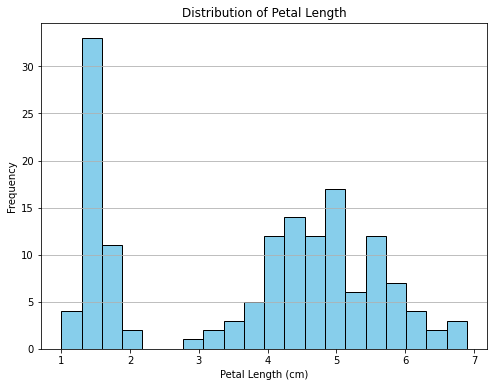

In [ ]:
# Histograms are great for visualizing the distribution of a single numerical variable.
# Histogram of petal lengths
plt.figure(figsize=(8, 6))
plt.hist(iris['petal_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

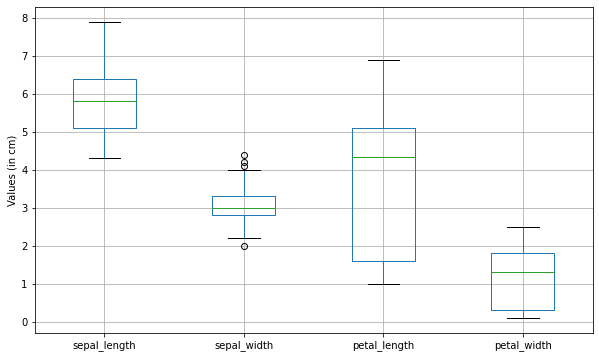

In [ ]:
# comparing attributes with boxplot
plt.figure(figsize=(10, 6))
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].boxplot()
plt.ylabel('Values (in cm)')
plt.show()

In [ ]:
iris['target'].unique()

array([0, 1, 2])

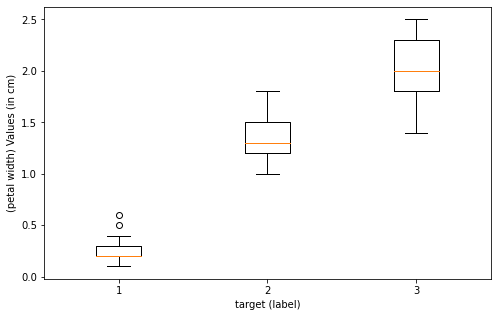

In [ ]:
# comparing classes
# let's take a look at the box plots of target for attribute "petal width"
plt.figure(figsize=(8, 5))
pw_0 = iris[iris['target'] == 0]['petal_width']
pw_1 = iris[iris['target'] == 1]['petal_width']
pw_2 = iris[iris['target'] == 2]['petal_width']

plt.boxplot([pw_0, pw_1, pw_2])
plt.ylabel('(petal width) Values (in cm)')
plt.xlabel('target (label)')
plt.show()

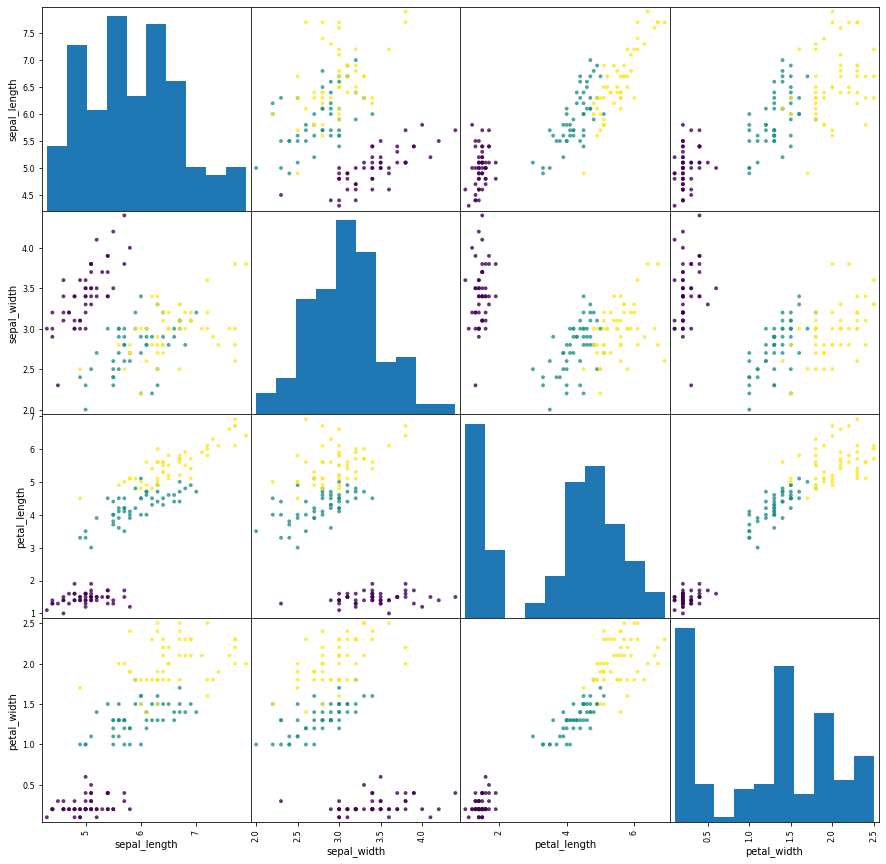

In [ ]:
## Scatter plots help us visualize data in 2D.
pd.plotting.scatter_matrix(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],
                                 c=iris['target'], figsize=(15, 15), s=60, alpha=.8)
plt.show()

## Overview: Classification with Sci-Kit Learn

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
    ## More methods at https://scikit-learn.org/stable/
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the classifier
    predictions = clf.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, predictions)  # Calculate accuracy
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 100.00%
Support Vector Machine Accuracy: 96.67%
K-Nearest Neighbors Accuracy: 100.00%
Decision Tree Accuracy: 100.00%


## Overview: Classification with PyTorch

In [ ]:
# Import necessary libraries
import torch  # PyTorch for creating and training neural networks
import torch.nn as nn  # PyTorch module for building neural network layers
import torch.optim as optim  # Optimizer module for gradient descent
from sklearn.datasets import load_iris  # Load the Iris dataset
from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardize features to have mean 0 and variance 1

# Load the Iris dataset
data = load_iris()  # Load Iris dataset from sklearn
X, y = data.data, data.target  # Split features (X) and labels (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # Use 80% of data for training and 20% for testing

# Standardize the features
scaler = StandardScaler()  # Initialize the scaler
X_train = scaler.fit_transform(X_train)  # Fit scaler on training data and transform it
X_test = scaler.transform(X_test)  # Transform test data using the fitted scaler

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Convert training features to PyTorch tensor (float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Convert test features to PyTorch tensor (float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Convert training labels to PyTorch tensor (long for classification)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)  # Convert test labels to PyTorch tensor (long for classification)

# Define the Neural Network class
class NeuralNetwork(nn.Module):  # Inherit from PyTorch's nn.Module
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()  # Initialize parent class
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.fc2 = nn.Linear(hidden_size, num_classes)  # Second fully connected layer (output layer)

    def forward(self, x):  # Define the forward pass
        x = self.fc1(x)  # Apply first linear layer
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Apply second linear layer (output layer)
        return x  # Return the final output

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]  # Number of input features (4 for Iris dataset)
hidden_size = 10  # Number of neurons in the hidden layer
num_classes = len(set(y))  # Number of unique classes (3 for Iris dataset)
model = NeuralNetwork(input_size, hidden_size, num_classes)  # Instantiate the model

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with a learning rate of 0.01

# Training loop
epochs = 100  # Number of training epochs
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)  # Compute predictions on training data
    loss = criterion(outputs, y_train_tensor)  # Calculate the loss

    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients from the previous step
    loss.backward()  # Compute gradients of the loss w.r.t model parameters
    optimizer.step()  # Update the parameters using gradients

    if (epoch + 1) % 10 == 0:  # Print loss every 10 epochs
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():  # Disable gradient computation for evaluation
    predictions = model(X_test_tensor)  # Make predictions on test data
    predicted_classes = torch.argmax(predictions, axis=1)  # Get the class with the highest probability
    accuracy = (predicted_classes == y_test_tensor).float().mean()  # Calculate accuracy
    print(f"Accuracy: {accuracy.item() * 100:.2f}%")  # Print accuracy as a percentage


Epoch [10/100], Loss: 0.9461
Epoch [20/100], Loss: 0.6304
Epoch [30/100], Loss: 0.4250
Epoch [40/100], Loss: 0.3218
Epoch [50/100], Loss: 0.2533
Epoch [60/100], Loss: 0.1991
Epoch [70/100], Loss: 0.1577
Epoch [80/100], Loss: 0.1275
Epoch [90/100], Loss: 0.1069
Epoch [100/100], Loss: 0.0927
Accuracy: 100.00%
